# Assignment 4

Due: Thursday Nov 6th EOD

## Q1. The Blasius equation appears in fluid mechanics as a laminar flow boundary layer and is written:

$$y^{\prime\prime\prime} + y y^{\prime\prime} = 0 $$

### a) Express this 3rd order ODE as a system of first order ODEs.
{answer}

Let $y_1 = y$, $y_2 = y'$, and $y_3 = y''$.
Then the system of first order ODEs is:
$$
\begin{align}
y_1' &= y_2 \\
y_2' &= y_3 \\
y_3' &= -y_1 y_3
\end{align}
$$

### b) Solve for $y(z)$ as an initial value problem assuming the boundary conditions below and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime\prime}(z = 0) &= 1 \\
\end{align}
$$

HINT: Read and consider part c) before implementing this.

{Method, answer}

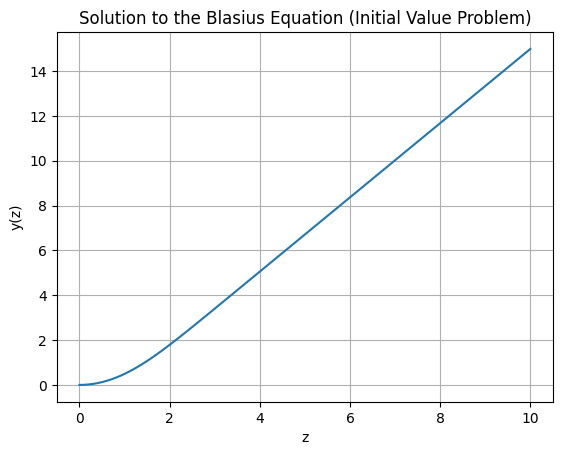

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of first order ODEs
def blasius_ode(z, y):
    y1, y2, y3 = y
    dy1_dz = y2
    dy2_dz = y3
    dy3_dz = -y1 * y3
    return [dy1_dz, dy2_dz, dy3_dz]

# Initial conditions
y0 = [0, 0, 1]

# Define the range for z
z_span = [0, 10] # We need to choose a suitable range for z

# Solve the ODE
sol = solve_ivp(blasius_ode, z_span, y0, dense_output=True)

# Evaluate the solution at a range of z values
z = np.linspace(z_span[0], z_span[1], 100)
y = sol.sol(z)

# Plot the solution y(z)
plt.plot(z, y[0, :])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('Solution to the Blasius Equation (Initial Value Problem)')
plt.grid(True)
plt.show()

## c) Use your *method* from b) to find a solution for $y(z)$ that fits the boundary conditions below, and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime}(z = \infty) &= 2 \\
\end{align}
$$

{Method, implementation, answer}

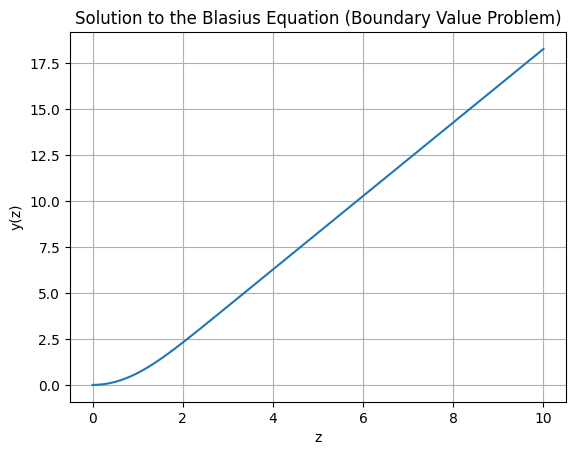

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Check if sol_optimal is available from the previous calculation in cell E6dtJcMCetfu
if 'sol_optimal' in locals():
    # Evaluate the solution at a range of z values
    z_optimal = np.linspace(sol_optimal.t[0], sol_optimal.t[-1], 100)
    y_optimal = sol_optimal.sol(z_optimal)

    # Plot the solution y(z)
    plt.plot(z_optimal, y_optimal[0, :])
    plt.xlabel('z')
    plt.ylabel('y(z)')
    plt.title('Solution to the Blasius Equation (Boundary Value Problem)')
    plt.grid(True)
    plt.show()
else:
    print("Please ensure that the shooting method in cell E6dtJcMCetfu has been executed successfully to generate the solution data.")

## Q2

The Fourier series shows that periodic functions can be written as an infinite sum of sine and cosine waves:

 $$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ \cos{(nx)} + B_n\ \sin{(nx)}$$

Due to function orthogonality, the values of $A_n$ and $B_n$ can be computed using the following formulae:

 $$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{(nx)}\ dx$$
 $$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{(nx)}\ dx$$

Periodic functions can be approximated by truncating the Fourier series at some $n = N$.

### 2a

Write a function that takes a $2-\pi$ periodic function and a degree $n$, then outputs the $n-th$ Fourier coefficients $[A_n, B_n]$. Use the equations above with a suitable integration method. (Don't use packaged Fourier analysis tools)

Test it for a suitable set of functions for which you have an analytic answer.

{implementation, answer}

In [4]:
import numpy as np
from scipy.integrate import quad

def fourier_coefficients(f, n):
    """
    Calculates the n-th Fourier coefficients An and Bn for a 2*pi periodic function.

    Args:
        f: The 2*pi periodic function.
        n: The degree of the coefficient to compute.

    Returns:
        A tuple containing the n-th Fourier coefficients (An, Bn).
    """
    # Calculate An
    integrand_an = lambda x: f(x) * np.cos(n * x)
    an, error_an = quad(integrand_an, -np.pi, np.pi)
    an /= np.pi

    # Calculate Bn
    integrand_bn = lambda x: f(x) * np.sin(n * x)
    bn, error_bn = quad(integrand_bn, -np.pi, np.pi)
    bn /= np.pi

    return an, bn

# Test the function with a known function, e.g., f(x) = x for -pi < x < pi
# The Fourier series for f(x) = x is 2 * sum((-1)^(n+1)/n * sin(nx))
# So, An = 0 and Bn = 2 * (-1)^(n+1) / n
def test_function(x):
    return x

# Test for n = 1
n_test = 1
an_test, bn_test = fourier_coefficients(test_function, n_test)
print(f"For f(x) = x and n = {n_test}:")
print(f"Calculated A{n_test}: {an_test}")
print(f"Calculated B{n_test}: {bn_test}")
print(f"Expected A{n_test}: 0")
print(f"Expected B{n_test}: {2 * (-1)**(n_test + 1) / n_test}")

# Test for n = 2
n_test = 2
an_test, bn_test = fourier_coefficients(test_function, n_test)
print(f"\nFor f(x) = x and n = {n_test}:")
print(f"Calculated A{n_test}: {an_test}")
print(f"Calculated B{n_test}: {bn_test}")
print(f"Expected A{n_test}: 0")
print(f"Expected B{n_test}: {2 * (-1)**(n_test + 1) / n_test}")

For f(x) = x and n = 1:
Calculated A1: 0.0
Calculated B1: 1.9999999999999998
Expected A1: 0
Expected B1: 2.0

For f(x) = x and n = 2:
Calculated A2: 0.0
Calculated B2: -0.9999999999999997
Expected A2: 0
Expected B2: -1.0


### 2b
Find the coefficients of the following functions and expansion orders:
{All answers}

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 5

In [5]:
# Define the function and the expansion order
f = lambda x: np.mod(x, np.pi/2)
N = 5

# Calculate and print the Fourier coefficients for n from 0 to N
print(f"Fourier Coefficients for f(x) = mod(x, pi/2) up to N = {N}:")
# Calculate A0 separately
a0, b0 = fourier_coefficients(f, 0)
print(f"A0: {a0}")
# Calculate An and Bn for n from 1 to N
for n in range(1, N + 1):
    an, bn = fourier_coefficients(f, n)
    print(f"A{n}: {an}, B{n}: {bn}")

Fourier Coefficients for f(x) = mod(x, pi/2) up to N = 5:
A0: 1.5707963267948966
A1: 1.0601848938211722e-16, B1: 3.533949646070574e-17
A2: -1.4135798584282297e-16, B2: -7.067899292141149e-17
A3: -7.067899292141149e-17, B3: 3.533949646070574e-17
A4: 4.1633363423443364e-17, B4: -0.5
A5: 1.1485336349729365e-16, B5: -7.067899292141149e-17


In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 20

In [6]:
# Define the function and the expansion order
f = lambda x: np.mod(x, np.pi/2)
N = 20

# Calculate and print the Fourier coefficients for n from 0 to N
print(f"Fourier Coefficients for f(x) = mod(x, pi/2) up to N = {N}:")
# Calculate A0 separately
a0, b0 = fourier_coefficients(f, 0)
print(f"A0: {a0}")
# Calculate An and Bn for n from 1 to N
for n in range(1, N + 1):
    an, bn = fourier_coefficients(f, n)
    print(f"A{n}: {an}, B{n}: {bn}")

Fourier Coefficients for f(x) = mod(x, pi/2) up to N = 20:
A0: 1.5707963267948966
A1: 1.0601848938211722e-16, B1: 3.533949646070574e-17
A2: -1.4135798584282297e-16, B2: -7.067899292141149e-17
A3: -7.067899292141149e-17, B3: 3.533949646070574e-17
A4: 4.1633363423443364e-17, B4: -0.5
A5: 1.1485336349729365e-16, B5: -7.067899292141149e-17
A6: -3.092205940311753e-17, B6: -5.300924469105861e-17
A7: -1.236882376124701e-16, B7: 8.834874115176436e-18
A8: -8.326672684688674e-17, B8: -0.24999999999999986
A9: 4.019867722405278e-16, B9: 2.208718528794109e-18
A10: -8.834874115176436e-18, B10: -3.920475388609543e-17
A11: -1.766974823035287e-17, B11: 1.766974823035287e-17
A12: -1.3252311172764653e-17, B12: -0.16666666666666669
A13: 7.50964299789997e-17, B13: -7.50964299789997e-17
A14: -1.4135798584282297e-16, B14: -1.3252311172764654e-16
A15: 1.3252311172764653e-17, B15: 1.4356670437161708e-16
A16: -1.6349768761081407e-16, B16: -0.12499999999999989
A17: 1.2921003393445538e-16, B17: 5.300924469105861e

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

In [7]:
# Define the function and the expansion order
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

# Calculate and print the Fourier coefficients for n from 0 to N
print(f"Fourier Coefficients for f(x) = (x > -pi/2) & (x < pi/2) up to N = {N}:")
# Calculate A0 separately
a0, b0 = fourier_coefficients(f, 0)
print(f"A0: {a0}")
# Calculate An and Bn for n from 1 to N
for n in range(1, N + 1):
    an, bn = fourier_coefficients(f, n)
    print(f"A{n}: {an}, B{n}: {bn}")

Fourier Coefficients for f(x) = (x > -pi/2) & (x < pi/2) up to N = 2:
A0: 1.0
A1: 0.6366197723675813, B1: 0.0
A2: 1.56689716897232e-17, B2: 0.0


In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

In [8]:
# Define the function and the expansion order
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

# Calculate and print the Fourier coefficients for n from 0 to N
print(f"Fourier Coefficients for f(x) = (x > -pi/2) & (x < pi/2) up to N = {N}:")
# Calculate A0 separately
a0, b0 = fourier_coefficients(f, 0)
print(f"A0: {a0}")
# Calculate An and Bn for n from 1 to N
for n in range(1, N + 1):
    an, bn = fourier_coefficients(f, n)
    print(f"A{n}: {an}, B{n}: {bn}")

Fourier Coefficients for f(x) = (x > -pi/2) & (x < pi/2) up to N = 20:
A0: 1.0
A1: 0.6366197723675813, B1: 0.0
A2: 1.56689716897232e-17, B2: 0.0
A3: -0.21220659078919374, B3: 0.0
A4: 6.938893903907228e-17, B4: 0.0
A5: 0.12732395447351624, B5: 0.0
A6: -3.0718464094453664e-17, B6: 0.0
A7: -0.0909456817667974, B7: 0.0
A8: -8.326672684688674e-17, B8: 0.0
A9: 0.07073553026306466, B9: 0.0
A10: 2.661535560615492e-17, B10: 0.0
A11: -0.057874524760689126, B11: 0.0
A12: -1.8360884946727667e-17, B12: 0.0
A13: 0.048970751720583114, B13: 0.0
A14: -1.9897580753902258e-16, B14: 0.0
A15: -0.042441318157838845, B15: 0.0
A16: -5.551115123125783e-17, B16: 0.0
A17: 0.03744822190397529, B17: 0.0
A18: 1.4644800397542362e-16, B18: 0.0
A19: -0.03350630380882009, B19: 0.0
A20: -1.713621678410103e-16, B20: 0.0


## Q3:

Given $$\int_{-1}^1 f(x) dx = 3$$ and $$f(-3^{-\frac{1}{2}}) = 1$$

Assuming $f$ is a cubic polynomial, what is $f(3^{-\frac{1}{2}})$? Why?

{answer}

Let the cubic polynomial be $f(x) = ax^3 + bx^2 + cx + d$.

We are given that $\int_{-1}^1 f(x) dx = 3$.
Let's evaluate the integral:
$\int_{-1}^1 (ax^3 + bx^2 + cx + d) dx = [\frac{a}{4}x^4 + \frac{b}{3}x^3 + \frac{c}{2}x^2 + dx]_{-1}^1$
$= (\frac{a}{4} + \frac{b}{3} + \frac{c}{2} + d) - (\frac{a}{4}(-1)^4 + \frac{b}{3}(-1)^3 + \frac{c}{2}(-1)^2 + d(-1))$
$= (\frac{a}{4} + \frac{b}{3} + \frac{c}{2} + d) - (\frac{a}{4} - \frac{b}{3} + \frac{c}{2} - d)$
$= \frac{a}{4} + \frac{b}{3} + \frac{c}{2} + d - \frac{a}{4} + \frac{b}{3} - \frac{c}{2} + d$
$= \frac{2b}{3} + 2d$

So, we have the equation $\frac{2b}{3} + 2d = 3$.

We are also given that $f(-3^{-1/2}) = 1$. Let $x_0 = 3^{-1/2}$. Then $-x_0 = -3^{-1/2}$.
So, $f(-x_0) = a(-x_0)^3 + b(-x_0)^2 + c(-x_0) + d = -ax_0^3 + bx_0^2 - cx_0 + d = 1$.

We want to find $f(3^{-1/2})$, which is $f(x_0) = ax_0^3 + bx_0^2 + cx_0 + d$.

Consider the sum of $f(x_0)$ and $f(-x_0)$:
$f(x_0) + f(-x_0) = (ax_0^3 + bx_0^2 + cx_0 + d) + (-ax_0^3 + bx_0^2 - cx_0 + d)$
$= 2bx_0^2 + 2d$

Since $x_0 = 3^{-1/2}$, $x_0^2 = (3^{-1/2})^2 = 3^{-1} = \frac{1}{3}$.
So, $f(x_0) + f(-x_0) = 2b(\frac{1}{3}) + 2d = \frac{2b}{3} + 2d$.

From the integral condition, we know that $\frac{2b}{3} + 2d = 3$.
Therefore, $f(x_0) + f(-x_0) = 3$.

We are given $f(-x_0) = f(-3^{-1/2}) = 1$.
Substituting this into the equation:
$f(3^{-1/2}) + 1 = 3$
$f(3^{-1/2}) = 3 - 1 = 2$.

**Answer:**

$f(3^{-1/2}) = 2$.

**Reasoning:**

The integral of a cubic polynomial $f(x) = ax^3 + bx^2 + cx + d$ from -1 to 1 simplifies to $\frac{2b}{3} + 2d$ due to the symmetry of the integration interval and the odd powers of $x$ integrating to zero over a symmetric interval. The sum of the function evaluated at $x_0$ and $-x_0$ for $x_0 = 3^{-1/2}$ is $f(x_0) + f(-x_0) = 2bx_0^2 + 2d = 2b(\frac{1}{3}) + 2d = \frac{2b}{3} + 2d$. Since both the integral and the sum $f(3^{-1/2}) + f(-3^{-1/2})$ are equal to $\frac{2b}{3} + 2d$, they are equal to each other. Given the integral is 3 and $f(-3^{-1/2}) = 1$, we can solve for $f(3^{-1/2})$.